# Aravinth R
# 19MIC0053
# LAB - FAT

## FP Growth

Compressing  the banking database  to  locate  frequent  itemsets  in  a  frequent  pattern  growth algorithm  to  mine  association  rules. Assume  the  items  located  in  a  banking  database  are  savings account, personnel loan, credit card, home loan, etc.

In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as p1

In [125]:
bank=pd.read_csv("/Users/aravinth/Desktop/Data Warehousing/FAT/Banking.csv")
print(bank)

  Bank_Name  Saving_Account  Personal_Loan  Credit Card  Home_Loan
0       SBI             120             17          120         16
1       CUB             150             15          140         11
2       IOB             134             10          130         10
3       KVB             125             12          120          8
4       PNB             130             17          130         12
5        AB             120             15          110         15
6       RBI             150             10          140          7
7        IB             134             12          120         14
8        AB             125             17          120         13


In [126]:
print(bank.iloc[5])

Bank_Name          AB
Saving_Account    120
Personal_Loan      15
Credit Card       110
Home_Loan          15
Name: 5, dtype: object


In [127]:
print(bank.iloc[1:10])

  Bank_Name  Saving_Account  Personal_Loan  Credit Card  Home_Loan
1       CUB             150             15          140         11
2       IOB             134             10          130         10
3       KVB             125             12          120          8
4       PNB             130             17          130         12
5        AB             120             15          110         15
6       RBI             150             10          140          7
7        IB             134             12          120         14
8        AB             125             17          120         13


In [128]:
print(bank.iloc[:,0:4])

  Bank_Name  Saving_Account  Personal_Loan  Credit Card
0       SBI             120             17          120
1       CUB             150             15          140
2       IOB             134             10          130
3       KVB             125             12          120
4       PNB             130             17          130
5        AB             120             15          110
6       RBI             150             10          140
7        IB             134             12          120
8        AB             125             17          120


In [129]:
print(bank.iloc[:,1])

0    120
1    150
2    134
3    125
4    130
5    120
6    150
7    134
8    125
Name: Saving_Account, dtype: int64


In [130]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
bank=pd.read_csv("/Users/aravinth/Desktop/Data Warehousing/FAT/Banking.csv")
list1=[]
for i in range (0,9):
    list1.append([str(bank.values[i,j]) for j in range (0,5)])
print(list1)
trans=TransactionEncoder()
trans_ary=trans.fit(list1).transform(list1)
data=pd.DataFrame(trans_ary,columns=trans.columns_)
data

[['SBI', '120', '17', '120', '16'], ['CUB', '150', '15', '140', '11'], ['IOB', '134', '10', '130', '10'], ['KVB', '125', '12', '120', '8'], ['PNB', '130', '17', '130', '12'], ['AB', '120', '15', '110', '15'], ['RBI', '150', '10', '140', '7'], ['IB', '134', '12', '120', '14'], ['AB', '125', '17', '120', '13']]


,10,11,110,12,120,125,13,130,134,14,...,7,8,AB,CUB,IB,IOB,KVB,PNB,RBI,SBI
0,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,True,False,False,False,False,False,False,True,True,False,...,False,False,False,False,False,True,False,False,False,False
3,False,False,False,True,True,True,False,False,False,False,...,False,True,False,False,False,False,True,False,False,False
4,False,False,False,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
5,False,False,True,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
6,True,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
7,False,False,False,True,True,False,False,False,True,True,...,False,False,False,False,True,False,False,False,False,False
8,False,False,False,False,True,True,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [131]:
from mlxtend.frequent_patterns import fpgrowth
fpgrowth(data,min_support=0.2)

,support,itemsets
0,0.555556,(4)
1,0.333333,(14)
2,0.222222,(12)
3,0.222222,(11)
4,0.222222,(10)
5,0.222222,(8)
6,0.222222,(7)
7,0.222222,(0)
8,0.333333,(3)
9,0.222222,(5)


In [132]:
frequent_item=fpgrowth(data,min_support=0.2,use_colnames=True)
print(frequent_item)

     support    itemsets
0   0.555556       (120)
1   0.333333        (17)
2   0.222222       (150)
3   0.222222        (15)
4   0.222222       (140)
5   0.222222       (134)
6   0.222222       (130)
7   0.222222        (10)
8   0.333333        (12)
9   0.222222       (125)
10  0.222222        (AB)
11  0.222222   (17, 120)
12  0.222222  (140, 150)
13  0.222222   (120, 12)
14  0.222222  (120, 125)
15  0.222222   (120, AB)


## Association Rule

In [133]:
from mlxtend.frequent_patterns import association_rules
rules=association_rules(frequent_item,metric='confidence',min_threshold=0.5)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(17),(120),0.333333,0.555556,0.222222,0.666667,1.2,0.037037,1.333333
1,(140),(150),0.222222,0.222222,0.222222,1.000000,4.5,0.172840,inf
2,(150),(140),0.222222,0.222222,0.222222,1.000000,4.5,0.172840,inf
3,(12),(120),0.333333,0.555556,0.222222,0.666667,1.2,0.037037,1.333333
4,(125),(120),0.222222,0.555556,0.222222,1.000000,1.8,0.098765,inf
5,(AB),(120),0.222222,0.555556,0.222222,1.000000,1.8,0.098765,inf


Implement Association RuleMining using FP Growth by assuming own inputs for showing monthly sales from thetextile shop.

In [134]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
textile=pd.read_csv("/Users/aravinth/Desktop/Data Warehousing/FAT/Textile.csv")
list1=[]
for i in range (0,14):
    list1.append([str(textile.values[i,j]) for j in range (0,5)])
print(list1)
trans=TransactionEncoder()
trans_ary=trans.fit(list1).transform(list1)
data=pd.DataFrame(trans_ary,columns=trans.columns_)
data

[['1', 'Formal', 'Low', '4', 'M'], ['2', 'Casual', 'Low', '5', 'L'], ['3', 'Vintage', 'High', '4', 'L'], ['4', 'Brief', 'Average', '3', 'XL'], ['5', 'Cute', 'Low', '2', 'M'], ['6', 'Formal', 'Low', '5', 'L'], ['7', 'Casual', 'Low', '4', 'M'], ['8', 'Vintage', 'High', '4', 'S'], ['9', 'Brief', 'Average', '5', 'M'], ['10', 'Cute', 'Low', '4', 'L'], ['11', 'Formal', 'Low', '3', 'L'], ['12', 'Casual', 'Low', '2', 'XL'], ['13', 'Vintage', 'High', '5', 'M'], ['14', 'Brief', 'Average', '4', 'L']]


,1,10,11,12,13,14,2,3,4,5,...,Casual,Cute,Formal,High,L,Low,M,S,Vintage,XL
0,True,False,False,False,False,False,False,False,True,False,...,False,False,True,False,False,True,True,False,False,False
1,False,False,False,False,False,False,True,False,False,True,...,True,False,False,False,True,True,False,False,False,False
2,False,False,False,False,False,False,False,True,True,False,...,False,False,False,True,True,False,False,False,True,False
3,False,False,False,False,False,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,True,False,False,True,...,False,True,False,False,False,True,True,False,False,False
5,False,False,False,False,False,False,False,False,False,True,...,False,False,True,False,True,True,False,False,False,False
6,False,False,False,False,False,False,False,False,True,False,...,True,False,False,False,False,True,True,False,False,False
7,False,False,False,False,False,False,False,False,True,False,...,False,False,False,True,False,False,False,True,True,False
8,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
9,False,True,False,False,False,False,False,False,True,False,...,False,True,False,False,True,True,False,False,False,False


In [135]:
from mlxtend.frequent_patterns import fpgrowth
fpgrowth(data,min_support=0.2)

,support,itemsets
0,0.571429,(21)
1,0.500000,(8)
2,0.357143,(22)
3,0.214286,(18)
4,0.428571,(20)
5,0.357143,(9)
6,0.214286,(16)
7,0.214286,(6)
8,0.214286,(24)
9,0.214286,(19)


In [136]:
frequent_item=fpgrowth(data,min_support=0.2,use_colnames=True)
print(frequent_item)

     support          itemsets
0   0.571429             (Low)
1   0.500000               (4)
2   0.357143               (M)
3   0.214286          (Formal)
4   0.428571               (L)
5   0.357143               (5)
6   0.214286          (Casual)
7   0.214286               (2)
8   0.214286         (Vintage)
9   0.214286            (High)
10  0.214286               (3)
11  0.214286           (Brief)
12  0.214286         (Average)
13  0.214286          (4, Low)
14  0.214286          (M, Low)
15  0.214286     (Formal, Low)
16  0.285714          (L, Low)
17  0.214286            (L, 4)
18  0.214286          (5, Low)
19  0.214286            (5, M)
20  0.214286     (Casual, Low)
21  0.214286          (2, Low)
22  0.214286   (Vintage, High)
23  0.214286  (Brief, Average)


## Association Rule

In [137]:
from mlxtend.frequent_patterns import association_rules
rules=association_rules(frequent_item,metric='confidence',min_threshold=0.5)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(M),(Low),0.357143,0.571429,0.214286,0.600000,1.050000,0.010204,1.071429
1,(Formal),(Low),0.214286,0.571429,0.214286,1.000000,1.750000,0.091837,inf
2,(L),(Low),0.428571,0.571429,0.285714,0.666667,1.166667,0.040816,1.285714
3,(Low),(L),0.571429,0.428571,0.285714,0.500000,1.166667,0.040816,1.142857
4,(L),(4),0.428571,0.500000,0.214286,0.500000,1.000000,0.000000,1.000000
5,(5),(Low),0.357143,0.571429,0.214286,0.600000,1.050000,0.010204,1.071429
6,(5),(M),0.357143,0.357143,0.214286,0.600000,1.680000,0.086735,1.607143
7,(M),(5),0.357143,0.357143,0.214286,0.600000,1.680000,0.086735,1.607143
8,(Casual),(Low),0.214286,0.571429,0.214286,1.000000,1.750000,0.091837,inf
9,(2),(Low),0.214286,0.571429,0.214286,1.000000,1.750000,0.091837,inf


Prepare and present various data presentation to project COVID cases from 2021 January  to 2021 may. Use suitable data and chart.

In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as p1

In [139]:
data=pd.read_csv("/Users/aravinth/Desktop/Data Warehousing/FAT/CovidActiveCases.csv")

#reference = https://www.worldometers.info/coronavirus/country/india/

In [140]:
print(data)

   Number   Month  ActiveCases
0       1  Jan 21       169112
1       2  Feb 21       169172
2       3  Mar 21       584067
3       4  Apr 21      3270089
4       5  May 21      1885874


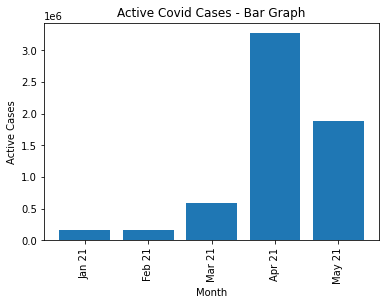

In [141]:
x=data.Month
y=data.ActiveCases
p1.title('Active Covid Cases - Bar Graph')
p1.xlabel('Month')
p1.ylabel('Active Cases')
x1 = np.arange(len(x))
p1.bar(x1,y)
p1.xticks(x1,x,color='Black',rotation=90)
p1.show()

Pie chart


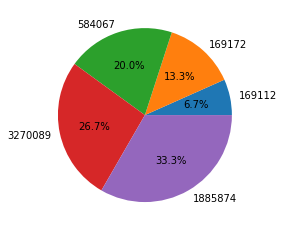

In [142]:
print("Pie chart")
x1=data.Number
y1=data.ActiveCases
p1.pie(x1,labels=y1,autopct='%1.1f%%')
p1.show()

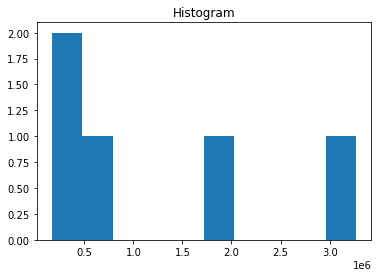

In [143]:
p1.title('Histogram')
y=(data.ActiveCases)
p1.hist(y)
p1.show()

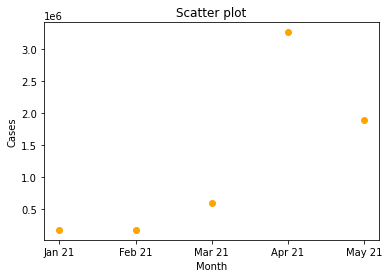

In [144]:
p1.title('Scatter plot')

p1.xlabel('Month')
p1.ylabel('Cases')
y=(data.ActiveCases)
x=(data.Month)
p1.scatter(x,y,color='orange',linestyle='solid')
p1.show()

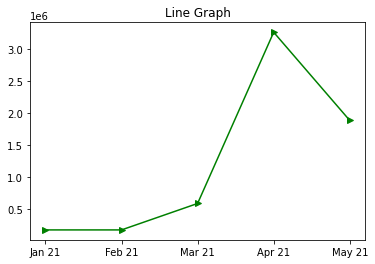

In [145]:
p1.title('Line Graph')
p1.plot(x,y,color='g',linestyle='solid',marker=">")
p1.show()

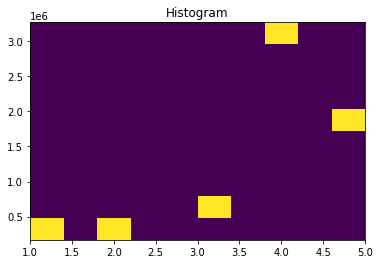

In [146]:
p1.title('Histogram')
p1.hist2d(data.Number,data.ActiveCases)
p1.show()